# Creating Fig. 4.9 for Master thesis: PPCs for conditions 'No' and 'threshold'

In [1]:
%load_ext autoreload
%autoreload 2
import os.path as op
import tempfile

import matplotlib.pyplot as plt


import hnn_core
from hnn_core import simulate_dipole, jones_2009_model
from hnn_core.viz import plot_dipole


import sys
sys.path.append('../code/')
sys.path.append('../code/utils/')
#sys.path.append('../code/sbi/')
#sys.path.append('../../results_cluster/')


import numpy as np
import torch

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


import os


import utils.sbi_modulated_functions

# sbi
from sbi import utils as utils
from sbi import analysis as analysis
from sbi.inference.base import infer
from sbi.inference import SNPE, prepare_for_sbi, simulate_for_sbi

from sbi.analysis import conditional_pairplot, conditional_corrcoeff



# import the summary statistics that you want to investigate
from summary_features.calculate_summary_features import calculate_summary_statistics_alternative as alternative_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal as temporal_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_number as number_sumstats
from summary_features.calculate_summary_features import calculate_summary_stats_temporal


In [2]:
print(torch.__version__)

1.11.0


In [3]:
## defining neuronal network model

num_params = 17

from utils.simulation_wrapper import set_network_default, SimulationWrapper
sim_wrapper = SimulationWrapper(num_params, noise=False)


In [4]:
window_len = 30


prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 35.9, 0.000042, 0.039372, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]


##larger priors:
#prior_min = [0, 0, 0, 0, 0, 13.3,  0, 0, 0, 0, 0, 51.980, 0, 0, 0, 0, 112.13]
#prior_max = [0.927, 0.160, 2.093, 1.0, 1.0, 44.9, 3.0, 7.0, 0.025902,  0.480, 0.117, 75.08, 8.633, 4.104, 1.0, 1.0, 162.110]

true_params = torch.tensor([[0.277, 0.0399, 0.6244, 0.3739, 0.0, 18.977, 0.000012, 0.0115, 0.0134,  0.0767, 0.06337, 63.08, 4.6729, 2.33, 0.016733, 0.0679, 120.86]])


prior = utils.torchutils.BoxUniform(low=prior_min, high=prior_max)

#number_simulations = 10
density_estimator = 'nsf'


In [5]:

#assert (prior.event_shape==torch.Size([25]))
from utils import inference

In [6]:
from utils import inference

import pickle
from data_load_writer import *
from data_load_writer import load_from_file as lf


import os

print(os.getcwd())



/home/ubuntu/sbi_for_eeg_data/notebooks


In [12]:
#file = '10000sims_17params_05_04_nsf_threshold'
file ='10000sims_17params_13_04_nsf_threshold_ratio'


print(os.getcwd())

os.chdir('/home/ubuntu/results')


print(os.getcwd())
  

posterior = torch.load('{}/posterior.pt'.format(file))

obs_real = torch.load('{}/obs_real.pt'.format(file))



/home/ubuntu/results
/home/ubuntu/results


In [8]:
samples_t_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


/home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/nflows/transforms/lu.py:81: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755861072/work/aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  outputs.t(), lower, upper=False, unitriangular=True


In [9]:
true_params_threshold = torch.tensor([0.08831, 0.01525, 0.19934, 0, 0, 26.61, 
                                     0.000007, 0.006562, 0.004317, 0.080074, 0.019482, 63.53,
                                     1.43884, 0.684013, 0, 0, 137.12])

In [10]:
file = '10000sims_17params_28_04_nsf_No'


thetas = torch.load('{}/thetas.pt'.format(file))

posterior = torch.load('{}/posterior.pt'.format(file))


obs_real2 = torch.load('{}/obs_real.pt'.format(file))

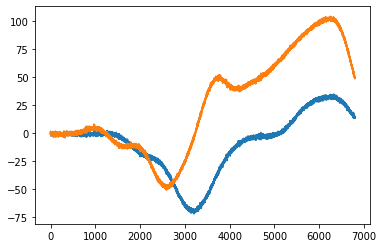

In [13]:
plt.plot(obs_real2)
plt.plot(obs_real)

In [14]:
samples_no_100 = posterior.sample((100,))

Drawing 100 posterior samples:   0%|          | 0/100 [00:00<?, ?it/s]

acceptance rate:  1.0


In [13]:
s_x_no = inference.run_only_sim(samples_no_100, simulation_wrapper=sim_wrapper, num_workers=8)

param size param size17 param size17 

param sizeparam size17early stop
  early stop17
early stop 200.0
param size200.0  param sizeparam size 
 param size200.01717  

early stop17
param size   early stop
200.017  early stop200.0

param size 17
 param size 
early stopearly stop  200.0200.0

param size param size    1717

param size 1717 

 1717

200.0
param size  17
num_params num_params17 
num_params 1717
num_paramsnum_params 
 1717
joblib will run over 1 jobs

num_paramsnum_paramsjoblib will run over 1 jobs 
joblib will run over 1 jobs17
 joblib will run over 1 jobs17
joblib will run over 1 jobs

joblib will run over 1 jobs
joblib will run over 1 jobs

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
num_params 17
joblib will run over 1 jobs
Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

In [14]:
torch.save(s_x_no, 's_x_no.pt')

In [15]:
s_x_no =torch.load('s_x_no.pt')

In [16]:
s_x_t = inference.run_only_sim(samples_t_100, simulation_wrapper=sim_wrapper, num_workers=8)
torch.save(s_x_t, 's_x_t.pt')
s_x_t = torch.load('s_x_t.pt')

param size param size17 param size 
17param size17
 
early stopearly stop17  
param size200.0200.0early stop

param sizeparam size  200.0param size param sizeparam size
    17param size  171717 
1717


early stop 200.0
param size  17
early stop 200.0
param size  
 early stop17

early stop 200.0
17param size  200.0

early stopparam size    17200.017

param size  17

num_paramsnum_paramsnum_params  num_params17  
171717num_params

 
17
joblib will run over 1 jobsjoblib will run over 1 jobsjoblib will run over 1 jobs


joblib will run over 1 jobsjoblib will run over 1 jobs

num_paramsnum_params [Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
17 17

joblib will run over 1 jobsnum_paramsjoblib will run over 1 jobs
 
17joblib will run over 1 jobs

Loading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_env/lib/python3.7/site-packages/hnn_core/mod/x86_64/.libs/libnrnmech.soLoading custom mechanism files from /home/ubuntu/miniconda3/envs/sbi_e

In [38]:
### sample from prior now
num_samples = 100
samples_prior = []


for i in range(num_samples):
    sample = prior.sample()
    samples_prior.append(sample)
    

In [17]:
#s_x_prior = inference.run_only_sim(samples_prior, sim_wrapper, num_workers=8)
#torch.save(s_x_prior, 's_x_prior.pt')
s_x_prior = torch.load('s_x_prior.pt')

In [18]:
s_x_torch_t = torch.stack(([s_x_t[i] for i in range(100)]))
#s_x_torch_s = torch.stack(([s_x_s[i] for i in range(100)]))
s_x_torch_no = torch.stack(([s_x_no[i] for i in range(100)]))
s_x_prior_torch = torch.stack(([s_x_prior[i] for i in range(100)]))


#mean_s = torch.mean(s_x_torch_s, 0)
#std_s = torch.std(s_x_torch_s, 0)

mean_no = torch.mean(s_x_torch_no, 0)
std_no = torch.std(s_x_torch_no, 0)

mean_t = torch.mean(s_x_torch_t, 0)
std_t = torch.std(s_x_torch_t, 0)

mean_prior = torch.mean(s_x_prior_torch, 0)
std_prior = torch.std(s_x_prior_torch, 0)

#lower_s = mean_s - 1.96 * std_s

#upper_s = mean_s + 1.96 * std_s

lower_no = mean_no - 1.96 * std_no

upper_no = mean_no + 1.96 * std_no


lower_t = mean_t - 1.96 * std_t

upper_t = mean_t + 1.96 * std_t


lower_prior = mean_prior - 1.96 * std_prior


upper_prior = mean_prior + 1.96 * std_prior



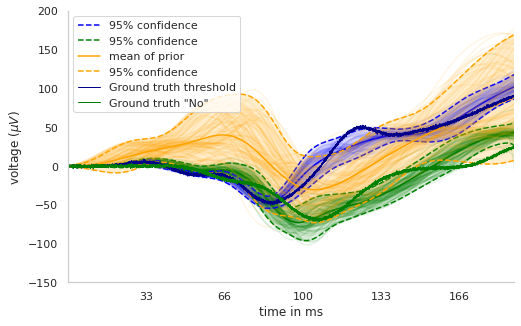

In [19]:
import seaborn as sns

sns.set() 

sns.set_style("whitegrid", {'axes.grid' : False})
#sns.set_style('ticks')

fig1, ax = plt.subplots(1, 1, figsize=(8,5))
#ax.set_title("Comparing signal")

    
plt.plot(mean_t, color ='blue')
plt.plot(mean_no, color ='green')
#plt.plot(mean_s, color ='green', label='mean of suprathreshold posterior')

for s in s_x_t:
    plt.plot(s, alpha=0.05, color='blue')
    #plt.ylim(-30,30)
    #plt.xlim(0, 5100)
    
for s in s_x_no:
    plt.plot(s, alpha=0.1, color='green')
    

plt.plot(lower_t, color='blue', linestyle='dashed', label='95% confidence')
plt.plot(upper_t, color='blue', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_t, y2=upper_t, color='blue', alpha=0.1)



plt.plot(lower_no, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_no, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_no, y2=upper_no, color='green', alpha=0.1)


#plt.xlim(0, 5100)
plt.ylim(-150, 200)


plt.plot(mean_prior, color ='orange', label='mean of prior')


for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.1, color='orange')

plt.plot(lower_prior, color='orange', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='orange', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='orange', alpha=0.2)



plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

fig1.gca().set_ylabel(r'voltage ($\mu V$)')
    
plt.plot(obs_real, color='darkblue', linewidth=1, linestyle='-', label='Ground truth threshold')


plt.plot(obs_real2, linestyle = '-', label='Ground truth "No"', color='green', linewidth=1)


plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])

plt.xlim(0, 5700)

sns.despine()
plt.legend(loc='upper left')

In [ ]:
plt.savefig('fig_4_9_ppc.png')

## Testing large versus small prior ranges: prior predictives

In [49]:
s_x_prior_torch2 = torch.stack(([s_x_prior2[i] for i in range(100)]))
mean_prior2 = torch.mean(s_x_prior_torch2, 0)
std_prior2 = torch.std(s_x_prior_torch2, 0)




lower_prior2 = mean_prior2 - 1.96 * std_prior2


upper_prior2 = mean_prior2 + 1.96 * std_prior2

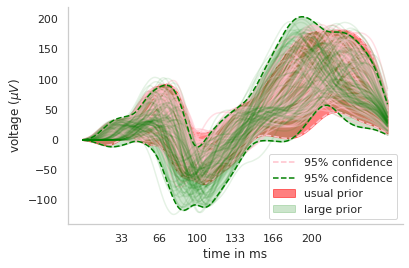

In [57]:
for x_w in s_x_prior2:
    plt.plot(x_w, alpha=0.5, color='pink')
    
plt.plot(lower_prior2, color='pink', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior2, color='pink', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior2, y2=upper_prior2, color='red', alpha=0.5, label='usual prior')

    
for x_w in s_x_prior:
    plt.plot(x_w, alpha=0.1, color='green')
    
plt.plot(lower_prior, color='green', linestyle='dashed', label='95% confidence')
plt.plot(upper_prior, color='green', linestyle='dashed')
plt.fill_between(x= torch.arange(len(mean_prior)), y1=lower_prior, y2=upper_prior, color='green', alpha=0.2, label='large prior')


plt.legend()
plt.xticks([1000, 2000, 3000, 4000, 5000, 6000],[33, 66, 100, 133, 166, 200])


plt.xlabel('time in ms')
#plt.ylabel('voltage ()')

plt.gca().set_ylabel(r'voltage ($\mu V$)')
sns.despine()